<a href="https://colab.research.google.com/github/taylan-sen/CIS490a_intro_ai/blob/main/AI_Machine_Learning_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Introduction

_The past is a powerful predictor of the future..._

<img src="https://obedparla.com/static/4735e71297f71ab3899378844938cf85/9ecde/predicting-the-future.jpg" width="400">

The field of ***machine learning*** emerged as a subfield of Artificial Intelligence which involves techniques for getting a *machine* to *learn* on its own. More specifically, machine learning broadly involves automated techniques in which past data is used predict characteristics of future data. Three main areas of machine learning are:

  * __Supervised Learning__ - In supervised learning there are defined data input and output pairs; given past data input and output pairs we want a computer program to predict the output of future inputs. The outputs are also called *labels* and are often created by humans. For example, the input may be a picture and the output may be a text description of the picture. A large set of pictures and their corresponding human-created text labels would be provided to a supervised learning algorithm or model in hopes that the model can learn how to predict appropriate text for future unseen pictures. This learning process is also called *training* the model. Supervised learning involves picking an appropriate mathematical model (*model selection*), selecting or designing useful ways of mathematically preprocessing the input data to extract useful features (*feature engineering*), and then training and evaluating the model performance with the selected features.   

  * __Unsupervised Learning__ - In unsupervised learning, there are no labels. Past data is automatically analyzed to determine if the data is distributed in patterns around regions of the input space. **Clustering techniques** find when data clusters around a finite number of centers or regions in the input space, *manifold learning* and *dimensionality reduction* techniques find surfaces or *embeddings* where data is more likely to be found in the input space. Generative Adversarial Networks effectively learn a probability density function of provided data over the input space.


  * __Reinforcement Learning__ - Given an *environment* in which *agents* need to decide between a set of *actions* in order to maximize some *performance measure*, reinformcement learning involved techniques in which past outcomes are used to evolve intelligent agents. For example, developing an intelligent agent to play tic tac toe or chess can be done through hand coding rules, or through reinforment learning techniques where only the environment rules and performance meausre are provided to a program which is then tasked with learning from simulated games.  

We sill spend the bulk of this unit exploring **supervised learning** techniques.  

There are two main classes of supervised learning methods:
  * **Parameteric Methods/Models** - There models are defined by a finitte set of parameters. Training the model involves determining the "best" parameters given past data.  
      * **linear regression** - the slope and intercept are the parameters of a linear regression model - for example predicting a person's height from weight.
      * **logistic regression**
      * **decision trees**
      * **neural networks**

  * **Nonparametric Methods/Algorithms** - in non-parametric methods, instead of modeling the data with a finite set of parameters, an output for a new input is defined by a set of steps operating directly by the training data
    * **k-nearest neighbor** in this method the labelled training data is saved in memory. For a new input for which we wish to predict the output, the algorithm finds the k points in the training set that are nearest to the input point. Out of these k training points, the most common output becomes the prediction for the given input.
    
Another major distinction between supervised learning methods are *regression models* and *classification models* (aka *classifiers* and *regressors*).

**Regression models** predict a quantity, such as the cost of a house given the square footage, or a person's height based upon their weight and shoe size.  

**Classifier models** in contrast predict a *class*, where there are a finite number of classes.  For example, given a picture of a face, a classifier may predict whether the face is happy, sad, or neutral. Another example classifier may take a picture of a hand-drawn digit and predict whether it represents a 0,1,2,3,4,5,6,7,8, or 9.  





### 2d input classification problem

X.shape: (150, 2)
# datapoints we have is: 100
# dimensions for each data point is: 2


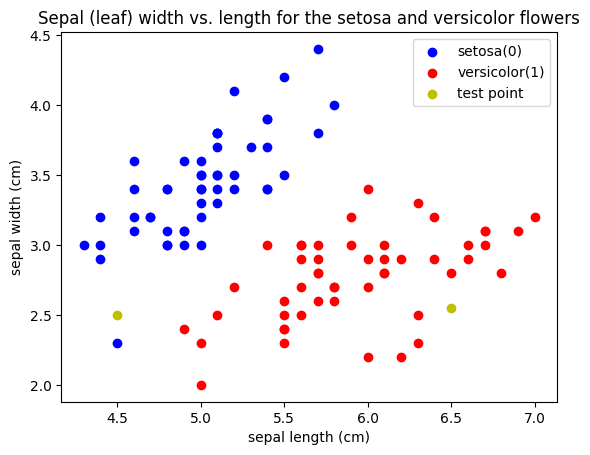

In [8]:
# import and plot example 2d data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_iris()
X = data.data[:,0:2]
y = data.target

# take only first two classes, y=0, y=1
print('X.shape:', X.shape)
Xsub = X[y!=2,:]
ysub = y[y!=2]
print('# datapoints we have is:', Xsub.shape[0])
print('# dimensions for each data point is:', Xsub.shape[1])

test_point = np.array([[6.5,2.55], [4.5,2.5]], dtype=float)

# what does data look like?
plt.scatter(Xsub[ysub==0,0], Xsub[ysub==0,1], color='b', label=data.target_names[0]+' (0)')
plt.scatter(Xsub[ysub==1,0], Xsub[ysub==1,1], color='r', label=data.target_names[1]+' (1)')
plt.scatter(test_point[:,0], test_point[:,1], color='y', label='test point')

plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Sepal (leaf) width vs. length for the setosa and versicolor flowers')
plt.legend()
plt.show()

## Logistic Regression and 1-nearest neighbor models



In [25]:
from sklearn import neighbors, linear_model, tree
model_knn = neighbors.KNeighborsClassifier(1)
model_lr = linear_model.LogisticRegression()
model_tree = tree.DecisionTreeClassifier(max_depth=2)

model_knn.fit(Xsub,ysub)
model_lr.fit(Xsub,ysub)
model_tree.fit(Xsub, ysub)


DecisionTreeClassifier(max_depth=2)

<ipython-input-29-a0de23c0a575>:24: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


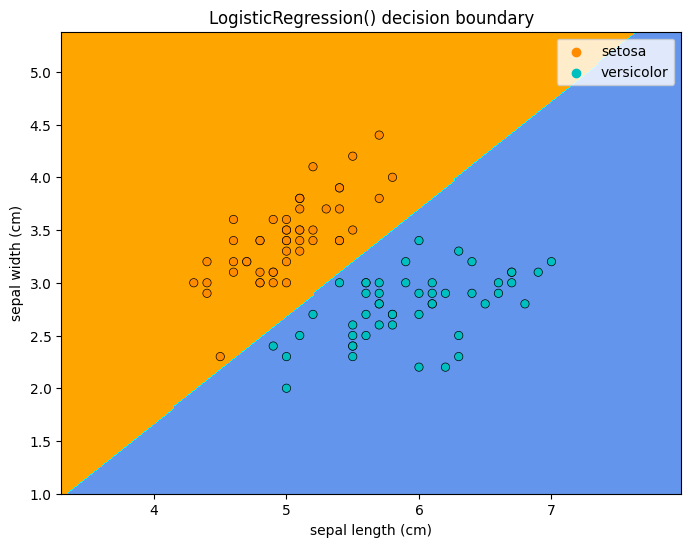

<ipython-input-29-a0de23c0a575>:24: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


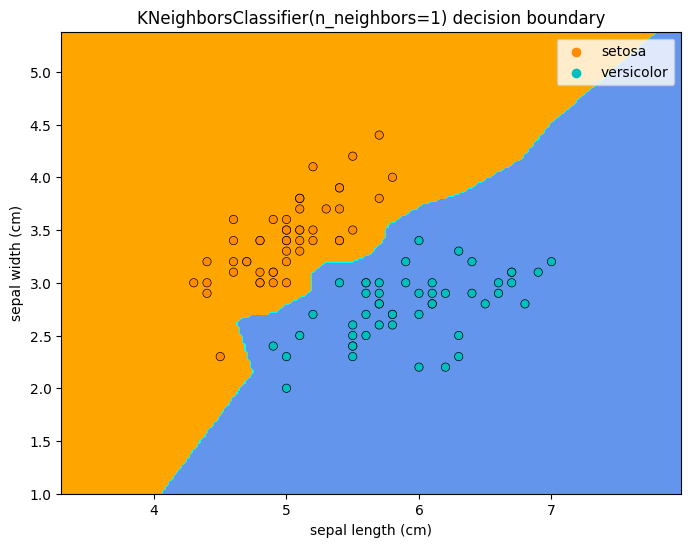

<ipython-input-29-a0de23c0a575>:24: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


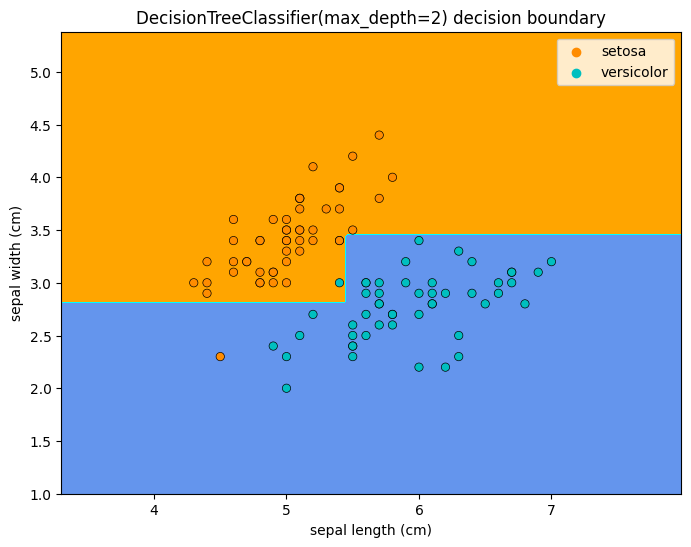

In [29]:
import seaborn as sns
from matplotlib.colors import ListedColormap
# lets see the KNN decision boundary

def plot_decision_boundary(model):
  h = 0.02  # step size in the mesh
  # Create color maps
  cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
  cmap_bold = ["darkorange", "c", "darkblue"]

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  x_min, x_max = Xsub[:, 0].min() - 1, Xsub[:, 0].max() + 1
  y_min, y_max = Xsub[:, 1].min() - 1, Xsub[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.figure(figsize=(8, 6))
  plt.contourf(xx, yy, Z, cmap=cmap_light)

  # Plot also the training points
  sns.scatterplot(
      x=Xsub[:, 0],
      y=Xsub[:, 1],
      hue=data.target_names[ysub],
      palette=cmap_bold,
      alpha=1.0,
      edgecolor="black",
  )
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  #plt.title(
  #    "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
  #)
  plt.xlabel(data.feature_names[0])
  plt.ylabel(data.feature_names[1])
  plt.title(str(model) + ' decision boundary')

  plt.show()

plot_decision_boundary(model_lr)
plot_decision_boundary(model_knn)
plot_decision_boundary(model_tree)